In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
dfcgpa=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
dfcgpa

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
dfcgpa.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
dfcgpa.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


Exploratory Data Analysis

In [5]:
# checking the dimension of the dataset
dfcgpa.shape

(571, 43)

In [6]:
# now let's check data for any null values
dfcgpa.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
dfcgpa.isnull().sum().sum()

425

There are total 425 null values in the dataset 

In [8]:
# information of the dataset 
dfcgpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Now let's see the unique values from any column 

In [9]:
dfcgpa['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [10]:
dfcgpa['PH-121'].nunique()

13

In [12]:
dfcgpa['HS-101'].unique()

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

In [13]:
dfcgpa['HS-101'].nunique()

12

In [14]:
dfcgpa['CS-301'].unique()

array(['B', 'A-', 'B+', 'D', 'B-', 'D+', 'C', 'C+', 'C-', 'A', nan, 'F',
       'A+'], dtype=object)

In [15]:
dfcgpa['CS-423'].unique()

array(['B', 'C', 'A-', 'C+', 'B-', 'B+', 'C-', 'A', 'D+', nan, 'D', 'A+',
       'F'], dtype=object)

In [16]:
dfcgpa.nunique().to_frame("No of unique values")

,No of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [17]:
#Now let's check the blank data from column
dfcgpa.loc[dfcgpa["CGPA"]==" "]
dfcgpa.loc[dfcgpa["CS-412"]==" "]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


No white spaces found in the data set columns

As grades are in alphabets we will counvert it into the numbers and also fill the nan values 

In [18]:
# dropping the seat number column
dfcgpa1=dfcgpa.drop('Seat No.',axis=1)

In [19]:
dfcgpa1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [20]:
from sklearn.preprocessing import LabelEncoder
for i in dfcgpa1.columns:
        if dfcgpa1[i].dtype == np.number:
            continue
        dfcgpa1[i] = LabelEncoder().fit_transform(dfcgpa1[i])
dfcgpa1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [42]:
dfcgpa1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [43]:
dfcgpa1['CS-419'].value_counts()

CS-419
2     120
3      89
4      85
5      78
0      56
7      46
6      40
8      20
12     13
10     13
9       7
1       2
11      2
Name: count, dtype: int64

In [44]:
dfcgpa1['CS-412'].unique()

array([ 2,  3,  0,  7,  4,  8,  5, 13,  1,  6, 10, 11, 12,  9])

In [45]:
dfcgpa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int32  
 1   HS-101     571 non-null    int32  
 2   CY-105     571 non-null    int32  
 3   HS-105/12  571 non-null    int32  
 4   MT-111     571 non-null    int32  
 5   CS-105     571 non-null    int32  
 6   CS-106     571 non-null    int32  
 7   EL-102     571 non-null    int32  
 8   EE-119     571 non-null    int32  
 9   ME-107     571 non-null    int32  
 10  CS-107     571 non-null    int32  
 11  HS-205/20  571 non-null    int32  
 12  MT-222     571 non-null    int32  
 13  EE-222     571 non-null    int32  
 14  MT-224     571 non-null    int32  
 15  CS-210     571 non-null    int32  
 16  CS-211     571 non-null    int32  
 17  CS-203     571 non-null    int32  
 18  CS-214     571 non-null    int32  
 19  EE-217     571 non-null    int32  
 20  CS-212    

In [24]:
dfcgpa1.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [25]:
#Now let's check the blank data from column
dfcgpa.loc[dfcgpa1["CGPA"]==" "]
dfcgpa.loc[dfcgpa1["CS-412"]==" "]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


No white spaces found in the dataset

In [27]:
dfcgpa1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


Date visualization part

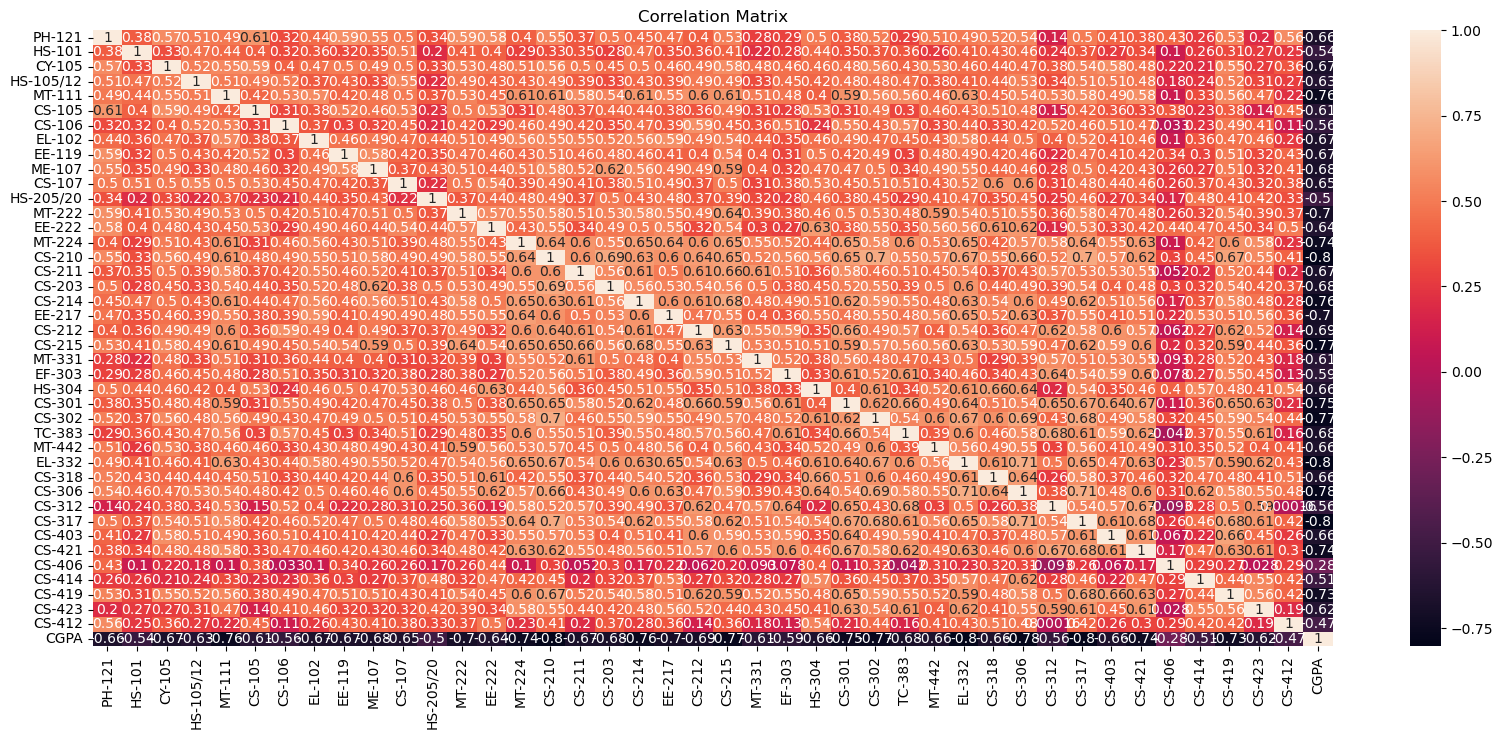

In [46]:
# Correlation matrix
plt.rcParams['figure.figsize']=(20,8)
correlation_matrix = dfcgpa1.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

here it seems bit difficult to understand from this graph

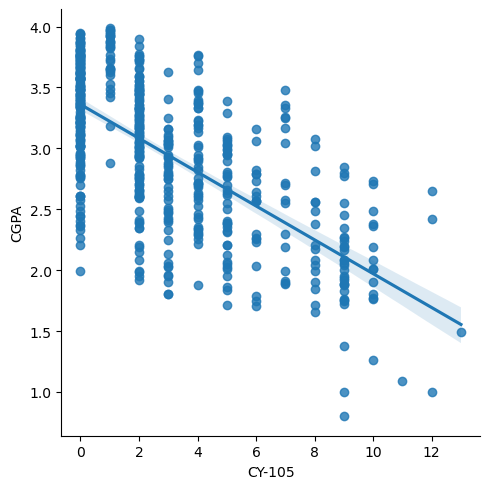

In [47]:
sns.lmplot(x='CY-105',y='CGPA',data=dfcgpa1,palette='colorblind')

Checking for the outliers if any

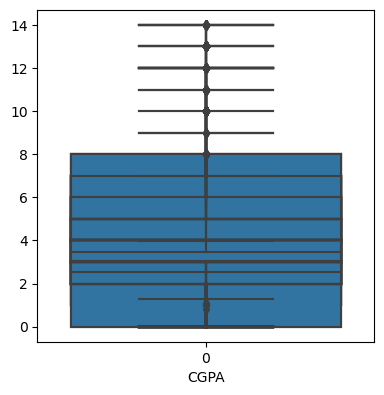

In [29]:
plt.figure(figsize=(20,25))
p=1
for i in dfcgpa1:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(dfcgpa1[i])
        plt.xlabel(i)

In [48]:
# Calculate the Z-Scores for each numerical attribute
z_scores=np.abs(stats.zscore(dfcgpa1.drop('CGPA', axis=1)))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
dfcgpa2=dfcgpa1[~outliers]


In [31]:
dfcgpa2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [49]:
# shape of new and old dataframe
print("Old Dataframe-",dfcgpa1.shape[0])
print("New Dateframe-",dfcgpa2.shape[0])

Old Dataframe- 571
New Dateframe- 556


In [50]:
print(((dfcgpa1.shape[0]-dfcgpa2.shape[0])/dfcgpa1.shape[0])*100)

2.626970227670753


The loss percentage of data is not more and it is within the limit

In [34]:
# Splitting the dataset into train and test sets

X = dfcgpa2.drop('CGPA', axis=1)
y = dfcgpa2['CGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y_train.value_counts()

CGPA
3.019    5
3.058    3
2.793    3
3.164    2
2.188    2
        ..
2.086    1
3.578    1
2.193    1
2.196    1
1.845    1
Name: count, Length: 400, dtype: int64

In [188]:
y_test.value_counts()

CGPA
3.019    2
3.772    2
3.625    2
1.992    1
2.574    1
        ..
3.754    1
3.369    1
3.477    1
2.776    1
2.715    1
Name: count, Length: 112, dtype: int64

We splitted the dataset in 80:20 as 80 triaing model and 20 test data

We will try different methods to train the model like kneighbor,Decision Tree, Logical Regression and Support Vector Machines to test the accuracy of the model and predict the values

In [51]:
# Initialize and train models

lr = LogisticRegression()
lr.fit(X_train, y_train)



# Evaluate models and choose the best one
from sklearn.metrics import accuracy_score, classification_report
models = [lr]
model_names = ['Logistic Regression']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [53]:

svm = SVC()
svm.fit(X_train, y_train)



# Evaluate models and choose the best one
from sklearn.metrics import accuracy_score, classification_report
models = [svm]
model_names = ['SVC']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.